In [3]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.1 (python 3.6.8) on 2020-05-31 19:46.
 Your version: 		 0.2.1 
 Latest version: 	 modeling


In [4]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [6]:
import os

import pandas as pd
import scipy as sp
import scanpy as sc
sc.set_figure_params(dpi=120)



In [7]:
dpath='p2export/'
gene_df = pd.read_csv(dpath + "genes.csv")

metadata = pd.read_csv(dpath + "metadata.csv")
metadata.index = metadata.CellId
del metadata["CellId"]

embedding_df = pd.read_csv(dpath + "embedding.csv")

In [8]:
x = sc.read_mtx(dpath + "spliced_count_matrix.mtx")
y = sc.read_mtx(dpath + "unspliced_count_matrix.mtx")

In [9]:
adata=x;
adata.layers['spliced'] = x.X
adata.layers['unspliced']= y.X

In [10]:
del x,y

In [11]:
metadata=metadata.astype({'Clusters': 'category', 'Annotation':'category'})

In [12]:
adata.var_names = gene_df["gene"].values
adata.obs_names = metadata.index.values

adata.obs = metadata.copy()
# Name according to embedding you saved
adata.X_umap = embedding_df.values
adata.obsm['X_umap'] = embedding_df.values

In [13]:
ann_pal = ["#AB29CCFF","#ABCC29FF","#296ACCFF","#29CC6AFF","#CC2929FF"]

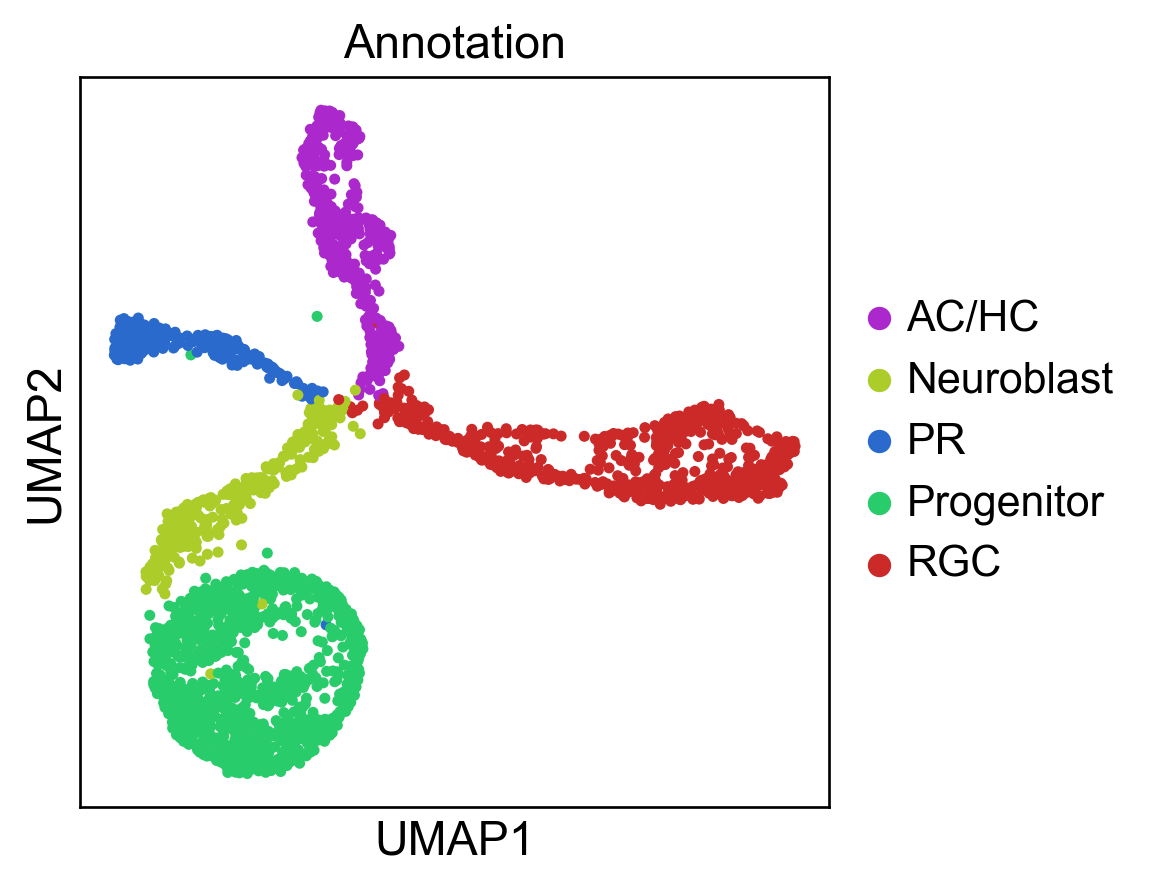

In [14]:
sc.pl.umap(adata, color='Annotation', frameon=True,palette=ann_pal)

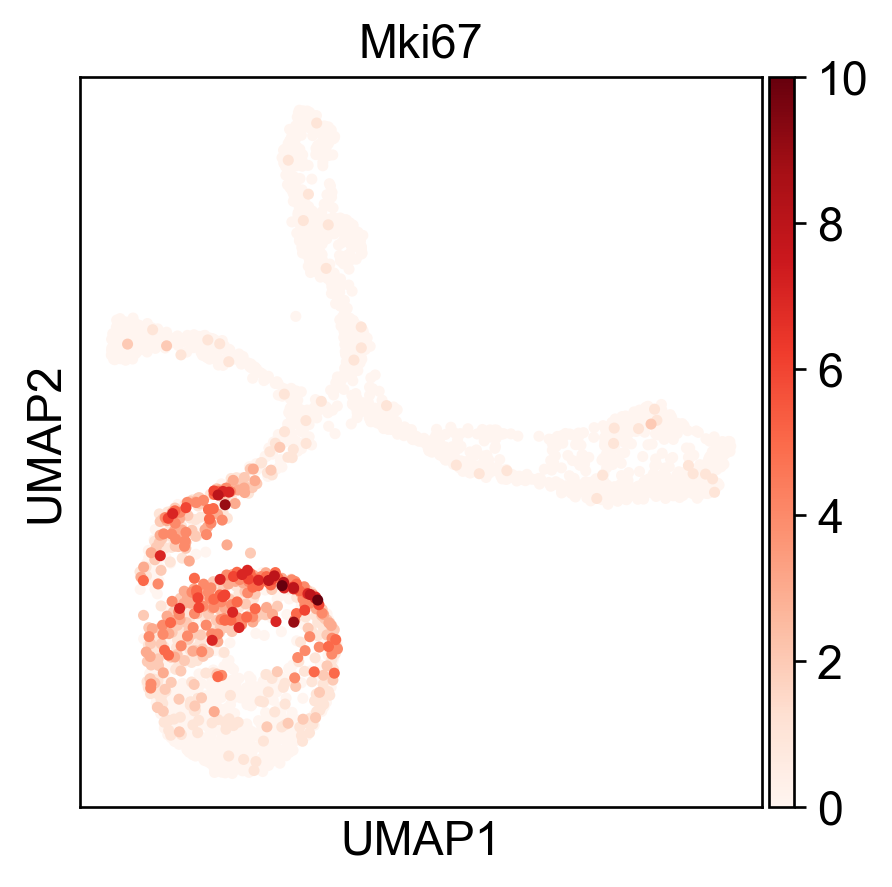

In [15]:
sc.pl.umap(adata, color='Mki67', frameon=True, cmap='Reds', use_raw=False)

In [16]:
adata

AnnData object with n_obs × n_vars = 2726 × 31053
    obs: 'Clusters', 'Annotation'
    uns: 'Annotation_colors'
    obsm: 'X_umap'
    layers: 'spliced', 'unspliced'

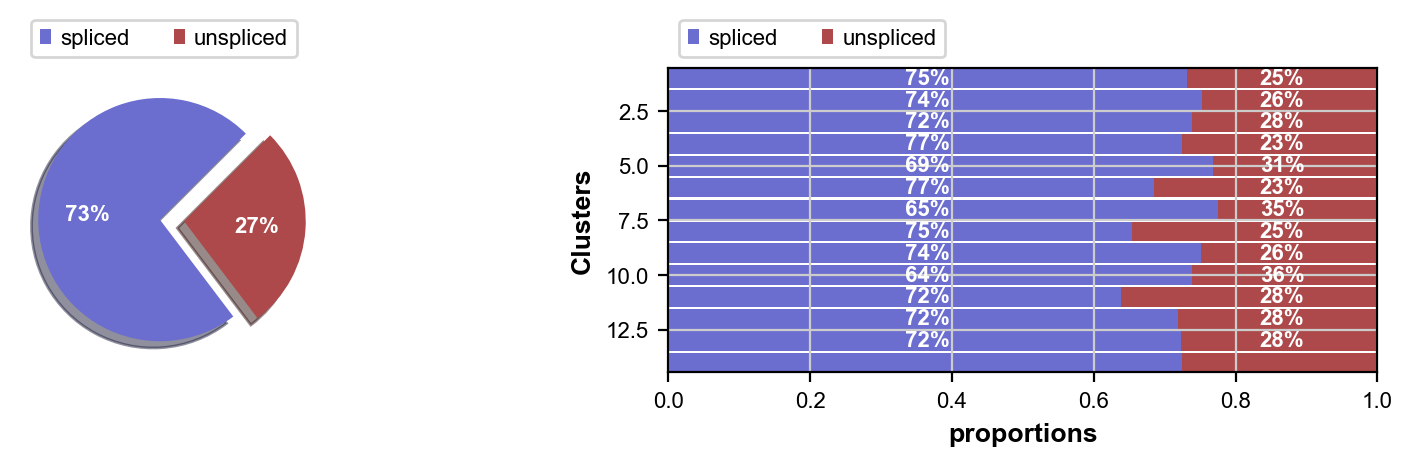

In [17]:
scv.pl.proportions(adata,groupby='Clusters')

In [18]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata,enforce=True)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 25381 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.


In [19]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 166 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [20]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [21]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [26]:
from matplotlib import rcParams
rcParams['axes.grid'] = False

saving figure to file ./figures/scvelo_ret_stream.png


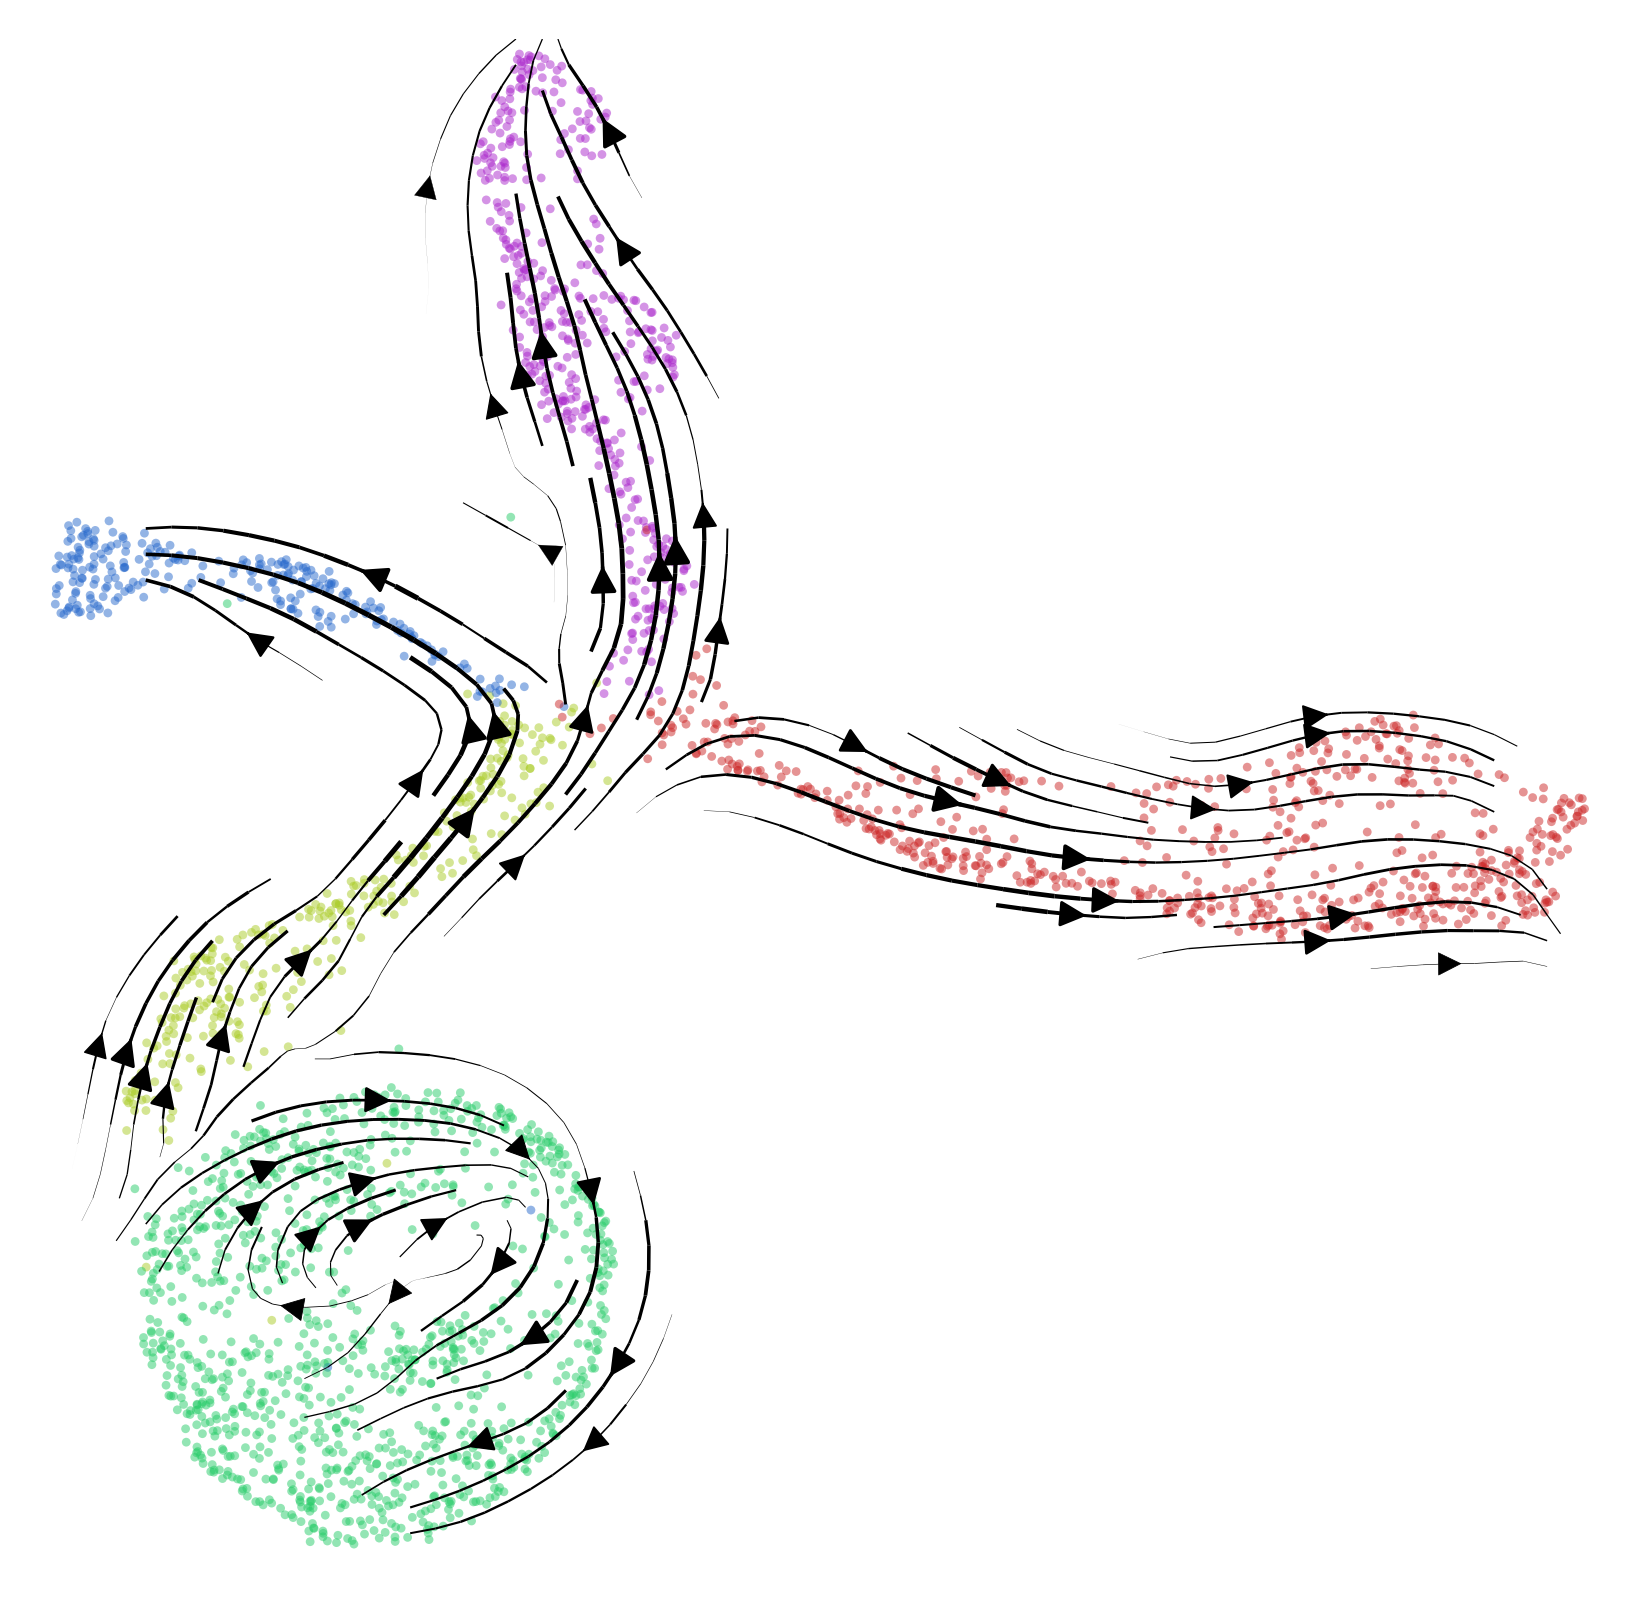

In [27]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color='Annotation',palette=ann_pal,
                                 dpi=200,size=10,linewidth=0.5,
                                min_mass=0.1,alpha=0.5,
                                legend_loc="none",xlabel='',ylabel='',frameon=0,title='',
                                save = 'ret_stream.png',figsize=(5,5))

saving figure to file ./figures/scvelo_ret_stream_small.png


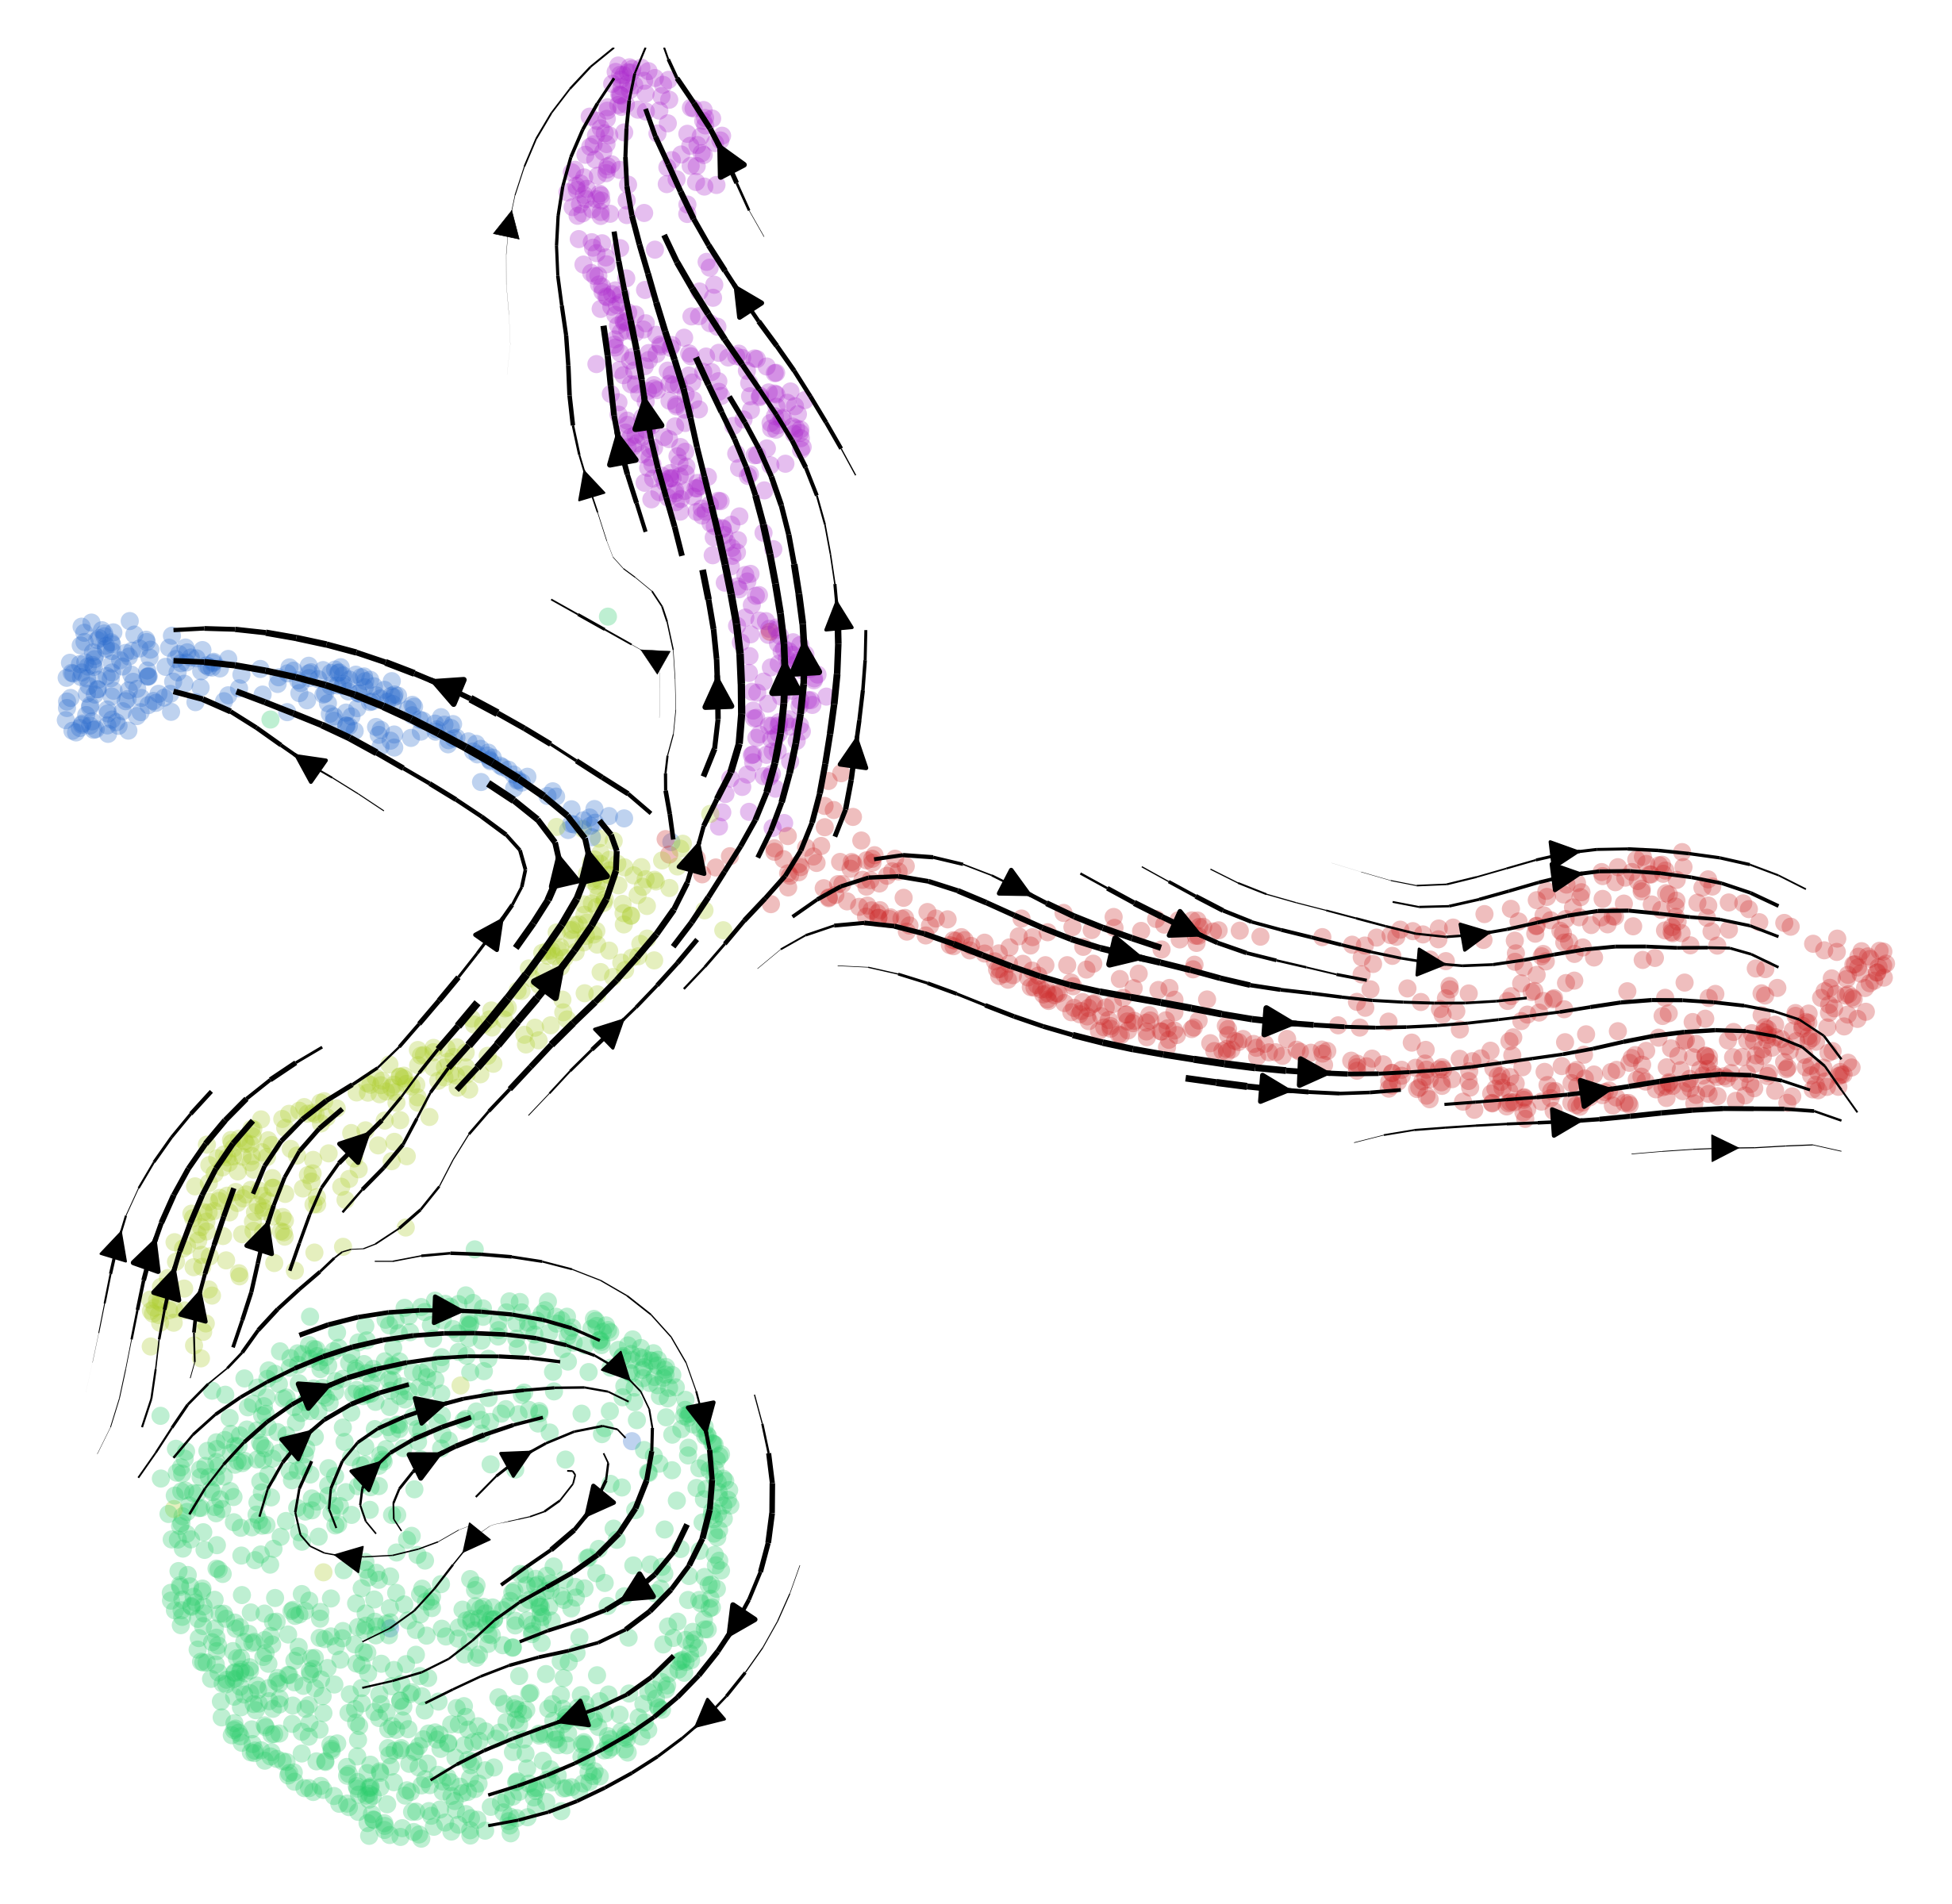

In [34]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color='Annotation',palette=ann_pal,
                                 dpi=300,size=30,linewidth=0.65,
                                min_mass=0.1,alpha=0.3,
                                legend_loc="none",xlabel='',ylabel='',frameon=0,title='',
                                save = 'ret_stream_small.png',figsize=(5,5))

In [29]:
scv.tl.score_genes_cell_cycle(adata)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


saving figure to file ./figures/scvelo_ret_phase.png


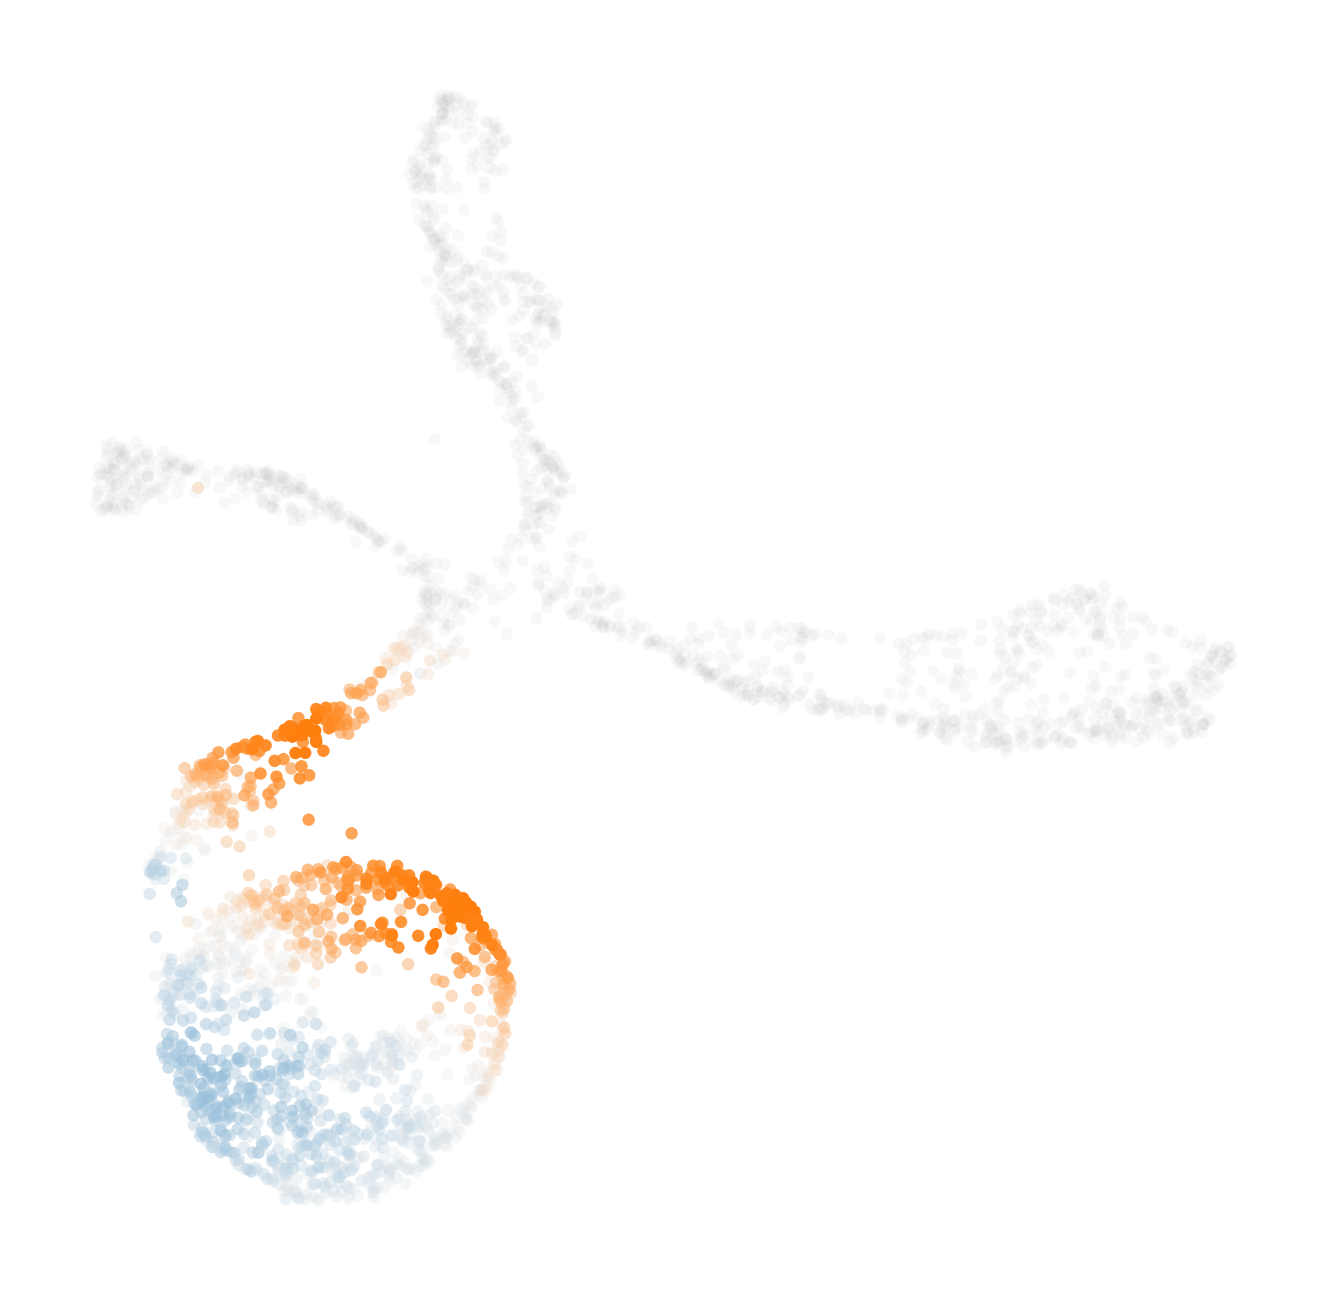

In [30]:
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95],
               frameon=0, size=20,legend_loc='none',save='ret_phase.png',dpi=200)